<a href="https://colab.research.google.com/github/changsksu/IMSE_Data_Science/blob/main/Two_Way_ANOVA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This Python notebook demonstrates the computation of Two-Way ANOVA. The example is from Montgomery Intro to SQC (7th ed chap 13). Paint Adhesion strength by primer types and application methods. Ref.
https://www.statology.org/two-way-anova-python/

In [ ]:
import math
import random
import statistics
import numpy as np
import scipy.stats
from scipy import stats
from scipy.stats import f_oneway
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.stats.multicomp as mc

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# mount google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#the 2nd read option assume that the data file is rignt under your default google drive directory
#note that the path is case sensitive
#use a text editor such as notepad to see the seperator dividing data
#go the 1st read option for local file: see the Read data from local file notebook for an example
data = pd.read_csv('drive/My Drive/Colab Notebooks/IMSE_Data_Science/Data/chap13 two factor paint adhesion.csv', sep=',', na_values=".")

data  

,Primer_type,App_Method,Adhesion
0,1,1,4.0
1,2,1,5.6
2,3,1,3.8
3,1,2,5.4
4,2,2,5.8
5,3,2,5.5
6,1,1,4.5
7,2,1,4.9
8,3,1,3.7
9,1,2,4.9


The F test from one-way ANOVA is used to test
**H0: tau5%=tau10%=tau15%=mtau20%=0 **vs
H1: at least one tau <>0
Since the pvalue is very small, we would reject H0 and conclude that 
there is a difference in paper strenght influenced by hardwood concentration 

In [ ]:
df=data #df means data frame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Primer_type  18 non-null     int64  
 1   App_Method   18 non-null     int64  
 2   Adhesion     18 non-null     float64
dtypes: float64(1), int64(2)
memory usage: 560.0 bytes


In [ ]:
# To generate anova table using the ols model from statsmodel

model = ols('Adhesion ~ C(Primer_type) + C(App_Method) + C(Primer_type):C(App_Method)', data=df).fit()
aov_table = sm.stats.anova_lm(model, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
C(Primer_type),4.581111,2.0,27.858108,0.000031
C(App_Method),4.908889,1.0,59.702703,0.000005
C(Primer_type):C(App_Method),0.241111,2.0,1.466216,0.269342
Residual,0.986667,12.0,NaN,NaN


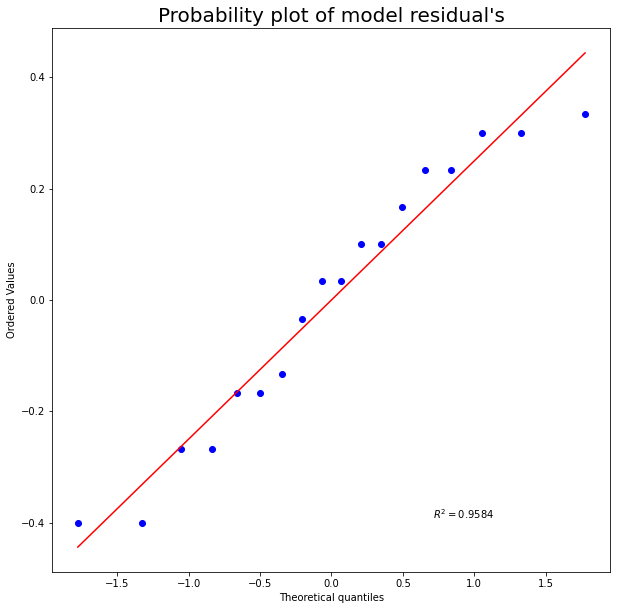

In [ ]:
# Residual Analysis
# normal check
fig = plt.figure(figsize= (10, 10))
ax = fig.add_subplot(111)

normality_plot, stat = stats.probplot(model.resid, plot= plt, rvalue= True)
ax.set_title("Probability plot of model residual's", fontsize= 20)
ax.set

plt.show()

In [ ]:
# Homogeneity of Variance check
# Levene() method for normality
# if the p value is small, reject H0 that the residuals have equal variance
# if the p value is large, cannot reject H0

stats.levene(df['Adhesion'][df['Primer_type'] == 1],
             df['Adhesion'][df['Primer_type'] == 2],
             df['Adhesion'][df['Primer_type'] == 3])
            

LeveneResult(statistic=1.7556634304207157, pvalue=0.20649180599000222)

The p value of the Levene is very large. We don't have evidence to conclude that the variances from different primer type are different

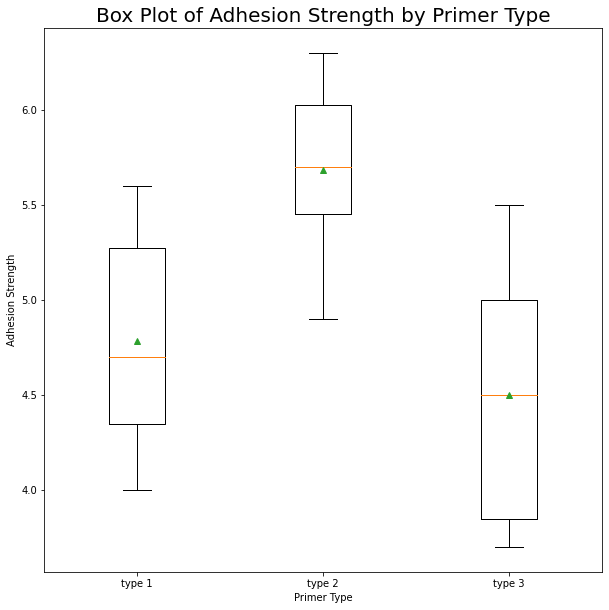

In [ ]:
# Box plots by factor Primer_type'
# If the IRQ=75% quartitle - 25% quartile are very different, then question the constant variance assumption
# If the F test p value is very small, we reject H0 and can use this box plot to identify the best factor level

fig = plt.figure(figsize= (10, 10))
ax = fig.add_subplot(111)

ax.set_title("Box Plot of Adhesion Strength by Primer Type", fontsize= 20)
ax.set

data2 = [df['Adhesion'][df['Primer_type'] == 1],
         df['Adhesion'][df['Primer_type'] == 2],
         df['Adhesion'][df['Primer_type'] == 3]]


ax.boxplot(data2,
           labels= ['type 1', 'type 2', 'type 3'],
           showmeans= True)

plt.xlabel("Primer Type")
plt.ylabel("Adhesion Strength")

plt.show()

There is not much difference in variation. The largest adhesion strength is due to type 2 primer type.

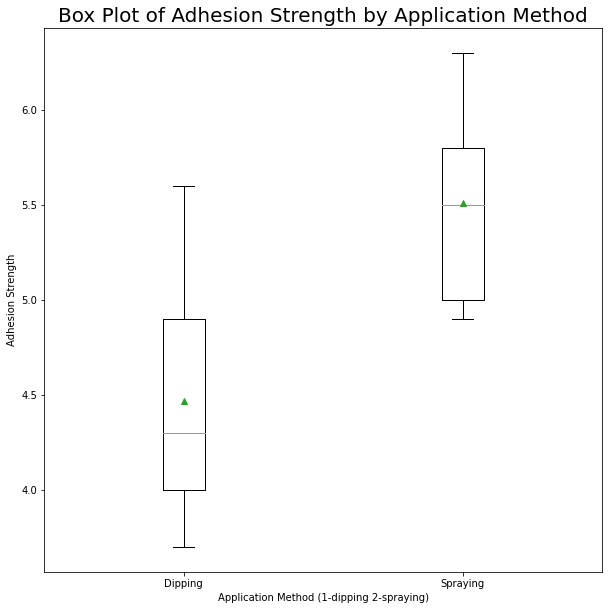

In [ ]:
# Box plots by factor Application Methods
# same instruction as the previous factor Primer types

fig = plt.figure(figsize= (10, 10))
ax = fig.add_subplot(111)

ax.set_title("Box Plot of Adhesion Strength by Application Method", fontsize= 20)
ax.set

data2 = [df['Adhesion'][df['App_Method'] == 1],
         df['Adhesion'][df['App_Method'] == 2]]


ax.boxplot(data2,
           labels= ['Dipping', 'Spraying'],
           showmeans= True)

plt.xlabel("Application Method (1-dipping 2-spraying)")
plt.ylabel("Adhesion Strength")

plt.show()

There is not much difference in variation by application method. The largest adhesion strength is due to spraying method.

In [ ]:
# testing the random order for collecting observations 
# Minitab calls the order variable, run order
# the following code generate a random order
# you should conduct your experiments using the random order generated
# for example, the first number is 5, it means that you will run the setting 5 in the experimentation table
# observation label 5 is primier type 3 and application method 2 (spraying)
# the run observation 11 and so on until all observations are collected
# import random (see the first cell)
N = len(eij)
c = list(range(0, N))
order = random.sample(c, N) # this should be replaced by the exact run order if the random order is not used
print('order of observations/residuals is')
print(order)

order of observations/residuals is
[7, 12, 16, 0, 1, 6, 13, 11, 2, 14, 17, 8, 9, 10, 3, 5, 15, 4]


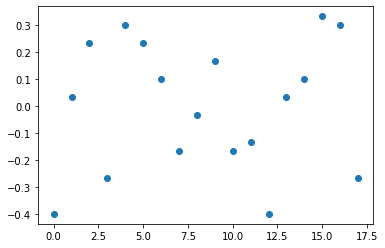

In [ ]:
# assume that this random order is how we collected the data in time sequence
# if there is no pattern in the scatter plot, then don't reject independence assumption

eij=model.resid

x = range(0,N) # from the first collected obs to the last in order
y = eij[order] # assign run order (see the previous code box)

plt.scatter(x, y)

The random order from the scatter plot above shows no pattern. If the data in the first half of the experiments are lower than 0 while those of the second half are above 0. Then there is a bias in data collection. If the residuals are small in the beginning but graduately increase. Or vice versa. It is a concern as well. In these cases, independence assumption is violated.

In [ ]:
eij=model.resid
eij

0    -0.266667
1     0.300000
2    -0.033333
3     0.100000
4    -0.266667
5     0.333333
6     0.233333
7    -0.400000
8    -0.133333
9    -0.400000
10    0.033333
11   -0.166667
12    0.033333
13    0.100000
14    0.166667
15    0.300000
16    0.233333
17   -0.166667
dtype: float64